<a href="https://colab.research.google.com/github/reeennico/Processamento-Digital-de-Sinais/blob/main/Cap_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 12: Aplicações em Comunicações

## Resumo
Os sistemas de comunicação atuais fazem uso extensivo do processamento digital de sinais (DSP) para tarefas como modulação, demodulação, filtragem e compressão de dados. O DSP possibilita a manipulação eficiente de sinais, reduzindo interferências, aprimorando a qualidade da transmissão e maximizando o aproveitamento da largura de banda.

Este capítulo aborda algumas das principais aplicações do DSP em comunicações digitais, incluindo:
- **Modulação e demodulação digital**
- **Filtragem digital para mitigação de ruído**
- **Codificação de voz (LPC - Linear Predictive Coding)**
- **Transmissão de sinais digitais e avaliação da taxa de erro de bit (BER)**

---

## 1. Modulação e Demodulação Digital
A modulação digital converte informações discretas em formas de onda analógicas para facilitar a transmissão. Entre os esquemas mais utilizados, destacam-se:

- **Modulação por Deslocamento de Fase (BPSK, QPSK)**: Codifica bits por meio de variações na fase da portadora.
- **Modulação por Amplitude em Quadratura (QAM)**: Combina amplitude e fase para aumentar a eficiência espectral.
- **Modulação por Frequência (FSK)**: Representa bits através de diferentes frequências da portadora.

A demodulação consiste na extração das informações transmitidas a partir do sinal recebido, utilizando técnicas de sincronização e filtragem adequadas.

---

### Implementação em Python:


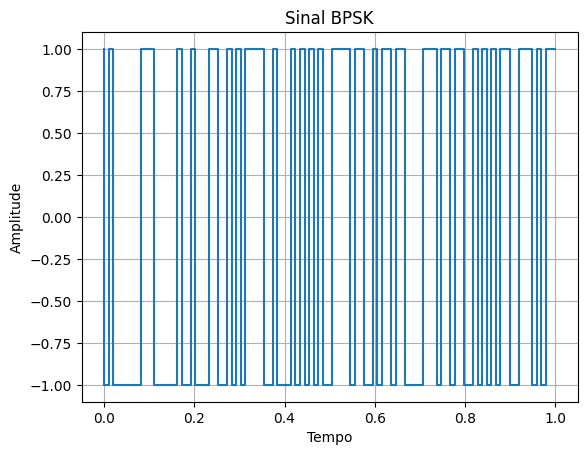

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Geração de um sinal binário aleatório
bits = np.random.randint(0, 2, 100)

# Mapeamento BPSK (0 -> -1, 1 -> +1)
bpsk_signal = 2*bits - 1

t = np.linspace(0, 1, len(bits))
plt.plot(t, bpsk_signal, drawstyle='steps-pre')
plt.title("Sinal BPSK")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## 2. Filtragem Digital para Redução de Ruído
O ruído é um fator crítico nos sistemas de comunicação, podendo comprometer a precisão na recepção dos dados. Para minimizar seus impactos, são aplicados filtros digitais que aprimoram a relação sinal-ruído, garantindo uma transmissão mais confiável.


---

### Implementação em Python:


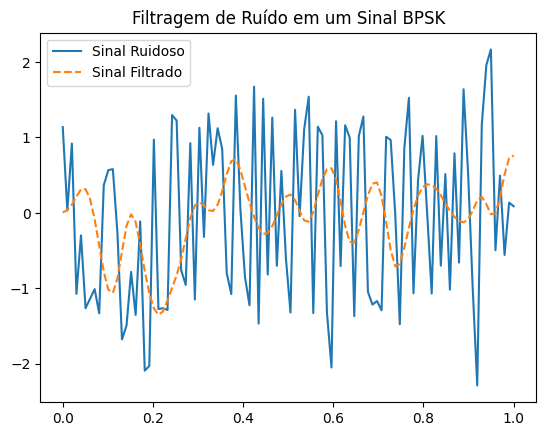

In [ ]:
from scipy.signal import butter, lfilter

# Definição do filtro passa-baixa Butterworth
b, a = butter(4, 0.2)
noisy_signal = bpsk_signal + 0.5 * np.random.randn(len(bits))
filtered_signal = lfilter(b, a, noisy_signal)

plt.figure()
plt.plot(t, noisy_signal, label='Sinal Ruidoso')
plt.plot(t, filtered_signal, label='Sinal Filtrado', linestyle='dashed')
plt.legend()
plt.title("Filtragem de Ruído em um Sinal BPSK")
plt.show()

## 3. Codificação de Voz (LPC - Linear Predictive Coding)
A codificação preditiva linear (LPC) é uma técnica amplamente empregada para compressão de sinais de voz. Ela representa a forma de onda vocal como uma combinação linear de amostras anteriores, permitindo reduzir significativamente a quantidade de dados transmitidos.

Principais vantagens do LPC:
- **Alta eficiência de compressão**: Diminui a taxa de transmissão mantendo uma boa qualidade de áudio.
- **Precisão na reconstrução**: Possibilita a síntese de voz artificial com fidelidade ao sinal original.


---

### Implementação em Python:


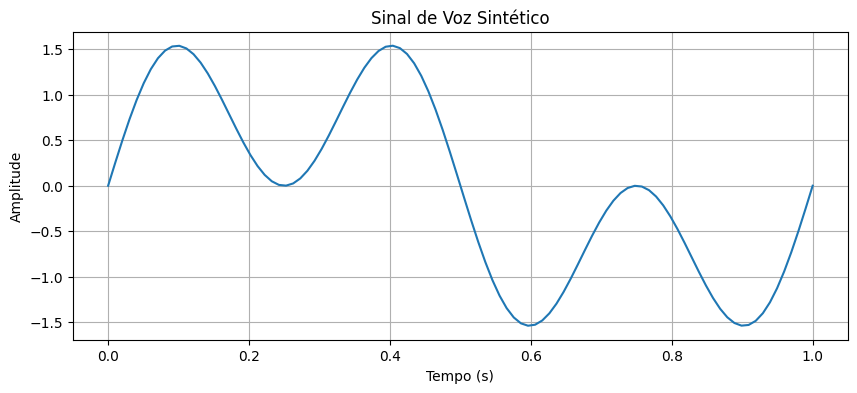

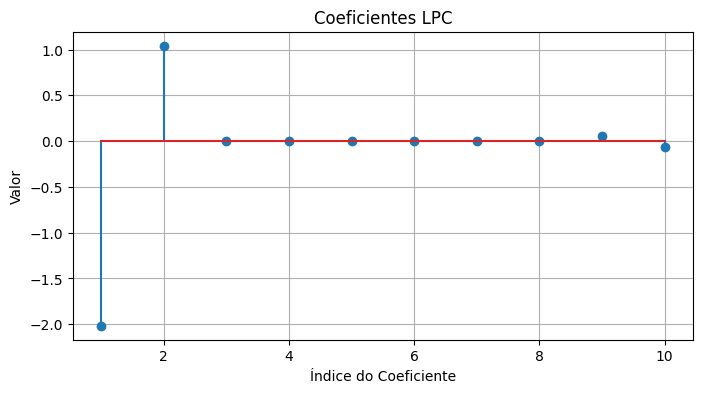

In [ ]:
from scipy.signal import lfilter
from scipy.linalg import toeplitz

# Sinal de voz sintético
voice_signal = np.sin(2 * np.pi * 100 * t) + np.sin(2 * np.pi * 300 * t)
order = 10  # Ordem do modelo LPC

autocorr = np.correlate(voice_signal, voice_signal, mode='full')
R = toeplitz(autocorr[len(voice_signal)-1:len(voice_signal)-1+order])
rhs = -autocorr[len(voice_signal):len(voice_signal)+order]
coefficients = np.linalg.solve(R, rhs)

# Plot do sinal de voz sintético
plt.figure(figsize=(10, 4))
plt.plot(t[:500], voice_signal[:500])  # Exibe apenas os primeiros 500 pontos
plt.title("Sinal de Voz Sintético")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
print(f"\n\n")
# Plot dos coeficientes LPC
plt.figure(figsize=(8, 4))
plt.stem(range(1, order + 1), coefficients)
plt.title("Coeficientes LPC")
plt.xlabel("Índice do Coeficiente")
plt.ylabel("Valor")
plt.grid()
plt.show()

## 4. Transmissão de Sinais Digitais e Análise de BER
A qualidade da transmissão de dados é frequentemente avaliada pela **Taxa de Erro de Bit (BER - Bit Error Rate)**, que indica a proporção de bits recebidos de forma incorreta devido a ruído ou interferências no canal.

Para reduzir erros na comunicação digital, são utilizadas diversas técnicas, tais como:
- **OFDM (Multiplexação por Divisão de Frequência Ortogonal)**: Mitiga interferências entre símbolos e melhora a eficiência espectral.
- **Codificação de erro (Hamming, Reed-Solomon)**: Introduz redundância para detectar e corrigir erros de transmissão.
- **Equalização adaptativa**: Ajusta dinamicamente os parâmetros do receptor para minimizar distorções no sinal recebido.

---

### Implementação em Python:


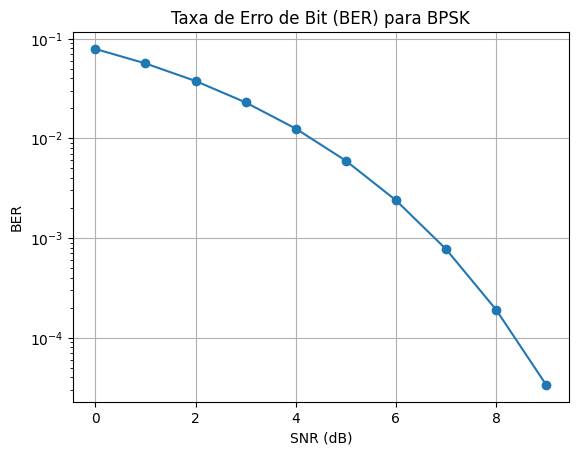

In [ ]:
from scipy.special import erfc

snr_db = np.arange(0, 10, 1)  # Relação sinal-ruído em dB
snr_linear = 10**(snr_db/10)  # Conversão para escala linear
ber = 0.5 * erfc(np.sqrt(snr_linear))  # Fórmula da BER para BPSK

plt.plot(snr_db, ber, marker='o')
plt.title("Taxa de Erro de Bit (BER) para BPSK")
plt.xlabel("SNR (dB)")
plt.ylabel("BER")
plt.yscale("log")
plt.grid()
plt.show()

## Conclusão
O processamento digital de sinais é fundamental para o funcionamento dos sistemas de comunicação modernos. Métodos como modulação digital, filtragem de ruído e codificação de voz são essenciais para melhorar a qualidade e a eficiência na transmissão de dados. A avaliação da **Taxa de Erro de Bit (BER)** possibilita a otimização dos sistemas, garantindo um desempenho mais robusto em diferentes condições de canal. O domínio dessas técnicas é indispensável para o avanço das tecnologias de comunicação.

